# Refinement

Assume that we have a medical database, where the sensitive information is the disease that has been diagnosed and we want to add noise to the answers of queries like:

> _Does patient $x$ has disease $y$?_

We are gonna examine a quite simpified scenario of 4 patients and 4 possible diseases. 

$$
\begin{array}{|c|c|c|c|}
\hline
C_0 & \text{COVID-2019} & \text{FLU-2018} & \text{H1N1} & \text{SARS-1}  \\ \hline
\text{Alice} & \textbf{1} & 0 & 0 & 0\\ \hline
\text{Bob} & 0 & \textbf{1} & 0 & 0 \\ \hline
\text{Charlie} & 0 & 0 & \textbf{1} & 0 \\ \hline
\text{Dave} & 0 & 0 & 0 & \textbf{1} \\ \hline
\end{array}
$$

Each row represents a patient and the $1$s mark the disease they have.

We can also model this using a channel matrix `C0` like below (after a few and small definitions).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

In [2]:
def get_pi(p, p_pos, n):
    return np.array([p if i == p_pos else (1-p)/(n-1) for i in range(n)])

def get_C(p, n):
    return np.array([get_pi(p, i, n) for i in range(n)])

In [3]:
n = 4 # number of patients which is also the number of possible diseases

In [4]:
C0 = get_C(1, n)
print("C0:\n", C0)

C0:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Answering truthfully with probability $p = 0.7$

One simple way of adding noise to our answers is to give the true answer with a somewhat high probability of let's say $0.7$ and distribute the remaining $0.3$ to the remaining possible outcomes (we may have added a bit too much noise for this specific scenario but the numbers are just to illustrate a specific example). This can be represented by a channel matrix $C_1$.

$$
\begin{array}{|c|c|c|c|}
\hline
C_1 & \text{COVID-2019} & \text{FLU-2018} & \text{H1N1} & \text{SARS-1}  \\ \hline
\text{Alice} & \textbf{0.7} & 0.1 & 0.1 & 0.1\\ \hline
\text{Bob} & 0.1 & \textbf{0.7} & 0.1 & 0.1 \\ \hline
\text{Charlie} & 0.1 & 0.1 & \textbf{0.7} & 0.1 \\ \hline
\text{Dave} & 0.1 & 0.1 & 0.1 & \textbf{0.7} \\ \hline
\end{array}
$$

In [5]:
C1 = get_C(0.7, n)
print("C1:\n", C1)

C1:
 [[0.7 0.1 0.1 0.1]
 [0.1 0.7 0.1 0.1]
 [0.1 0.1 0.7 0.1]
 [0.1 0.1 0.1 0.7]]


Given a uniform prior, we compute its Posterior Bayes Vulnerability and its Multiplicative Bayes Capacity.

In [6]:
pi = probab.uniform(len(C1[0]))

In [7]:
print("Posterior Bayes Vulnerability:", measure.bayes_vuln.posterior(pi, C1))
print("Multiplicative Bayes Capacity:", measure.bayes_vuln.mult_capacity(C1))

Posterior Bayes Vulnerability: 0.7
Multiplicative Bayes Capacity: 2.8


Notice that the channel's posterior vulnerability is equal $0.7$ which is also the probability we answer truthfully.

### Answering truthfully with probability $p = 0.6$

Someone could be curious to epxeriment with a channel using a smaller $p$ of let's say $0.6$. Channel matrix $C_2$ represents this case.

$$
\begin{array}{|c|c|c|c|}
\hline
C_2 & \text{COVID-2019} & \text{FLU-2018} & \text{H1N1} & \text{SARS-1}  \\ \hline
\text{Alice} & \textbf{0.6} & 0.133 & 0.133 & 0.133\\ \hline
\text{Bob} & 0.133 & \textbf{0.6} & 0.133 & 0.133 \\ \hline
\text{Charlie} & 0.133 & 0.133 & \textbf{0.6} & 0.133 \\ \hline
\text{Dave} & 0.133 & 0.133 & 0.133 & \textbf{0.6} \\ \hline
\end{array}
$$

In [8]:
C2 = get_C(0.6, n)
# C2[1] = np.array(get_pi(1, 1, n))
print("C2:\n", C2)

C2:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]


Let's also compute its Posterior Bayes Vulnerability and Multiplicative Bayes Capacity again, under a uniform prior.

In [9]:
print("Posterior Bayes Vulnerability:", measure.bayes_vuln.posterior(pi, C2))
print("Multiplicative Bayes Capacity:", measure.bayes_vuln.mult_capacity(C2))

Posterior Bayes Vulnerability: 0.6
Multiplicative Bayes Capacity: 2.4


Notice that again its posterior vulnerability is equal to the probability we answer truthfully.

### Comparing $C_1$ and $C_2$

The vulnerability of $C_2$ is less than that of $C_1$, so **under that specific prior** we are sure that $C_2$ leaks in general less information about the patients than $C_1$. But what happens under different priors? Someone might say that $C_2$ seems like leaking less information in general. $C_2$ also has a smaller multiplicative capacity. But can we be sure?

Let's see what happens under a specific family of prior distritubtions generated by `get_pi(p)`. 

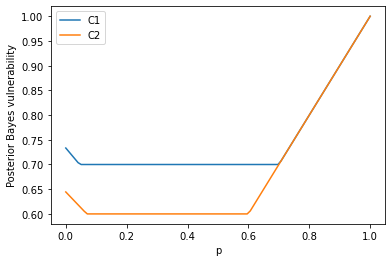

In [10]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C1) for p in ps], label="C1")
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C2) for p in ps], label="C2")
plt.xlabel('p')
plt.ylabel('Posterior Bayes vulnerability')
plt.legend()
None

Looks like that the posterior vulnerability of $C_2$ is always smaller than that of $C_1$. But if we want to be sure that this happens for every possible prior distribution (or even for every possible gain function) we have to check for refinement. 

If $C_1$ is refined by $C_2$, then $C_2$ is always more secure than $C_1$. That is, it always has a smaller vulnerability than $C_1$.

In [11]:
refined = refinement.refined_by(C1, C2)
print("Is C1 refined by C2?", refined)

Is C1 refined by C2? True


Looks like our intuition was right!

Refinement also means that $C_2$ is a post processing of $C_1$. That means that there exists a channel $R$ such that takes every output of $C_1$, processes it furtherly, produces an output and in total, their combined behaviour ($C_1$ and $R$) is exactly like that of $C_2$.

In [12]:
R = channel.factorize(C2, C1)
print("Is C1.R == C2? ", np.allclose(C1.dot(R), C2))
print("\nR:\n", R)
print("\nC1.R:\n", C1.dot(R))
print("\nC2:\n", C2)

Is C1.R == C2?  True

R:
 [[0.83333333 0.05555556 0.05555556 0.05555556]
 [0.05555556 0.83333333 0.05555556 0.05555556]
 [0.05555556 0.05555556 0.83333333 0.05555556]
 [0.05555556 0.05555556 0.05555556 0.83333333]]

C1.R:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]

C2:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]


Note that the rows of $R$ represent diseases not persons! So if we put labels on each row and column as before, it would look like this.

$$
\begin{array}{|c|c|c|c|}
\hline
R & \text{COVID-2019} & \text{FLU-2018} & \text{H1N1} & \text{SARS-1}  \\ \hline
\text{COVID-2019} & \textbf{0.833} & 0.555 & 0.555 & 0.555 \\ \hline
\text{FLU-2018} & 0.555 & \textbf{0.833} & 0.555 & 0.555 \\ \hline
\text{H1N1} & 0.555 & 0.555 & \textbf{0.833} & 0.555 \\ \hline
\text{SARS-1} & 0.555 & 0.555 & 0.555 & \textbf{0.833} \\ \hline
\end{array}
$$